In [426]:
from utils import *

In [8]:

client = MongoClient()


In [9]:

db = client['Companies']


In [10]:
query_bd = {'number_of_employees':{'$gt':99}, 'founded_year':{'$lt':2011}, 'deadpooled_year': {'$eq': None}}

In [11]:
my_companies = list(db.Companies.find(query_bd, {'name':1, 'category_code':1, 'number_of_employees':1, 'founded_year':1, 'tag_list':1, 'description':1, 'overview':1, 'total_money_raised':1, 'offices':1, 'ipo':1 }))

In [12]:
df_raw_companies = pd.DataFrame(my_companies)

In [13]:
df_raw_companies.head()

,_id,category_code,description,founded_year,ipo,name,number_of_employees,offices,overview,tag_list,total_money_raised
0,52cdef7c4bab8bd675297d8e,social,Social network,2004,"{'valuation_amount': 104000000000, 'valuation_...",Facebook,5299,"[{'description': 'Headquarters', 'address1': '...",<p>Facebook is the world&#8217;s largest socia...,"facebook, college, students, profiles, network...",$2.43B
1,52cdef7c4bab8bd675297d94,social,Real time communication platform,2006,"{'valuation_amount': 18100000000, 'valuation_c...",Twitter,1300,"[{'description': '', 'address1': '1355 Market ...","<p>Created in 2006, Twitter is a global real-t...","text, messaging, social, community, twitter, t...",$1.16B
2,52cdef7c4bab8bd675297d9b,web,Online Marketplace,1995,"{'valuation_amount': None, 'valuation_currency...",eBay,15000,"[{'description': 'Headquarters', 'address1': '...","<p>Founded in 1995 in San Jose, CA, eBay conne...","auction, bid, search, market",$6.7M
3,52cdef7c4bab8bd675297da2,network_hosting,,1984,"{'valuation_amount': None, 'valuation_currency...",Cisco,63000,"[{'description': 'Headquarters', 'address1': '...","<p>Cisco designs and sells hardware, software,...",networking,$2.5M
4,52cdef7c4bab8bd675297da3,web,News and On-line directory,1994,"{'valuation_amount': None, 'valuation_currency...",Yahoo!,13600,"[{'description': None, 'address1': '701 First ...",<p>Yahoo was founded in 1994 by Stanford Ph.D....,"search, portal, webmail, photos",$6.8M


In [14]:
metric_df = pd.DataFrame.from_dict(top_cities(df_raw_companies), orient='index', columns=['local_comp'])

In [15]:
metric_df['dist_param'] = pd.DataFrame.from_dict(get_dist_param(df_raw_companies), orient='index').set_index(metric_df.index)

In [80]:
metric_df['cost_param'] = pd.DataFrame([cost_cities[i.split(',')[0]] for i in metric_df.index]).set_index(metric_df.index)

In [280]:
scores = pd.DataFrame(metric_df.apply(metric_score, axis=1))



In [283]:
metric_df['score'] = scores

In [420]:
top_comp = metric_df.sort_values('local_comp', ascending=False)[:10]

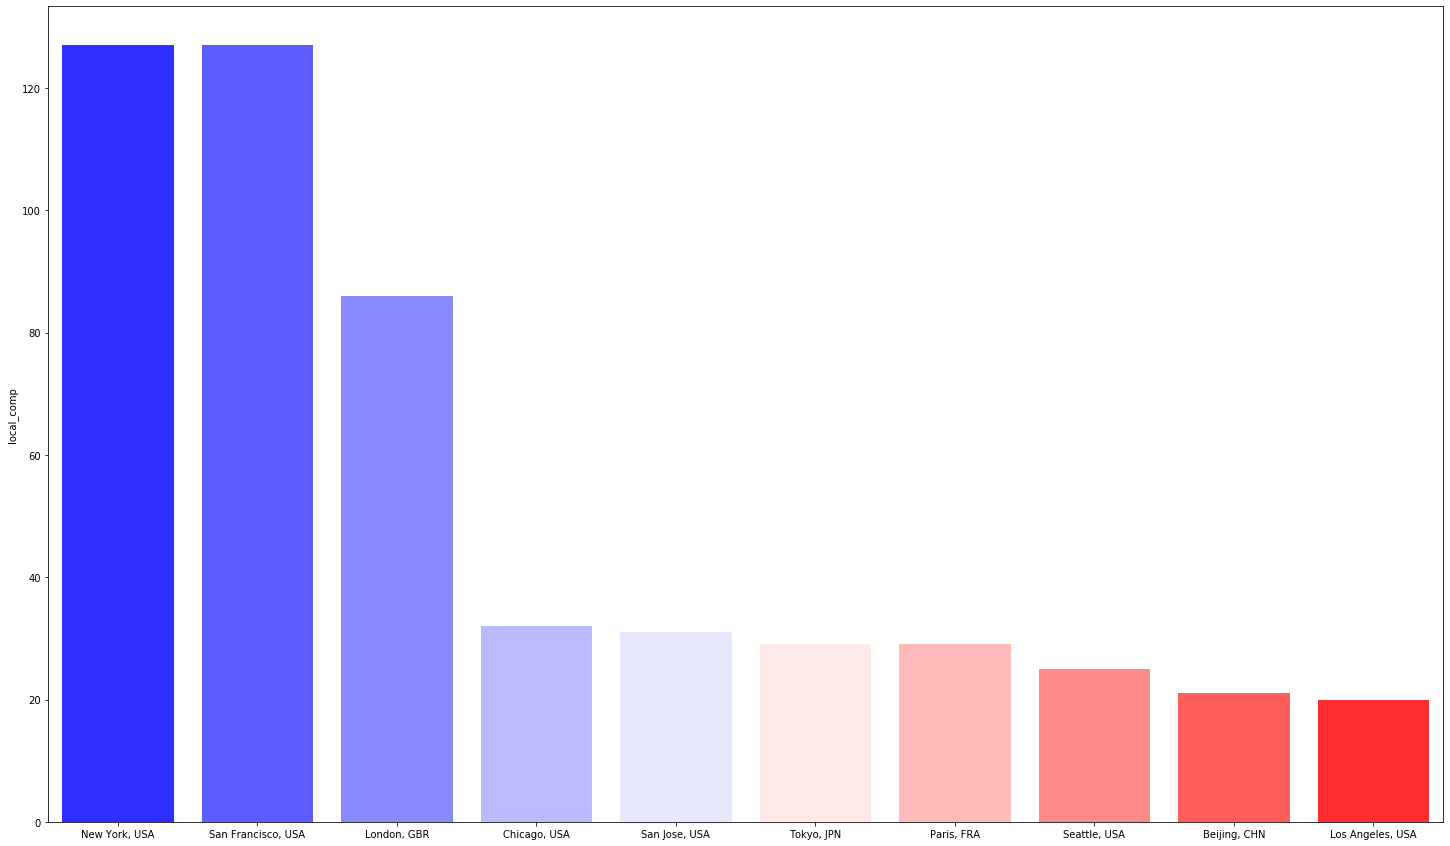

In [422]:
plt.figure(figsize=(25,15))
sns.barplot(x = top_comp.index , y='local_comp', data = top_comp, palette='bwr', saturation=3)
plt.show()

In [418]:
top_con = metric_df.sort_values('dist_param', ascending=False)[:10]

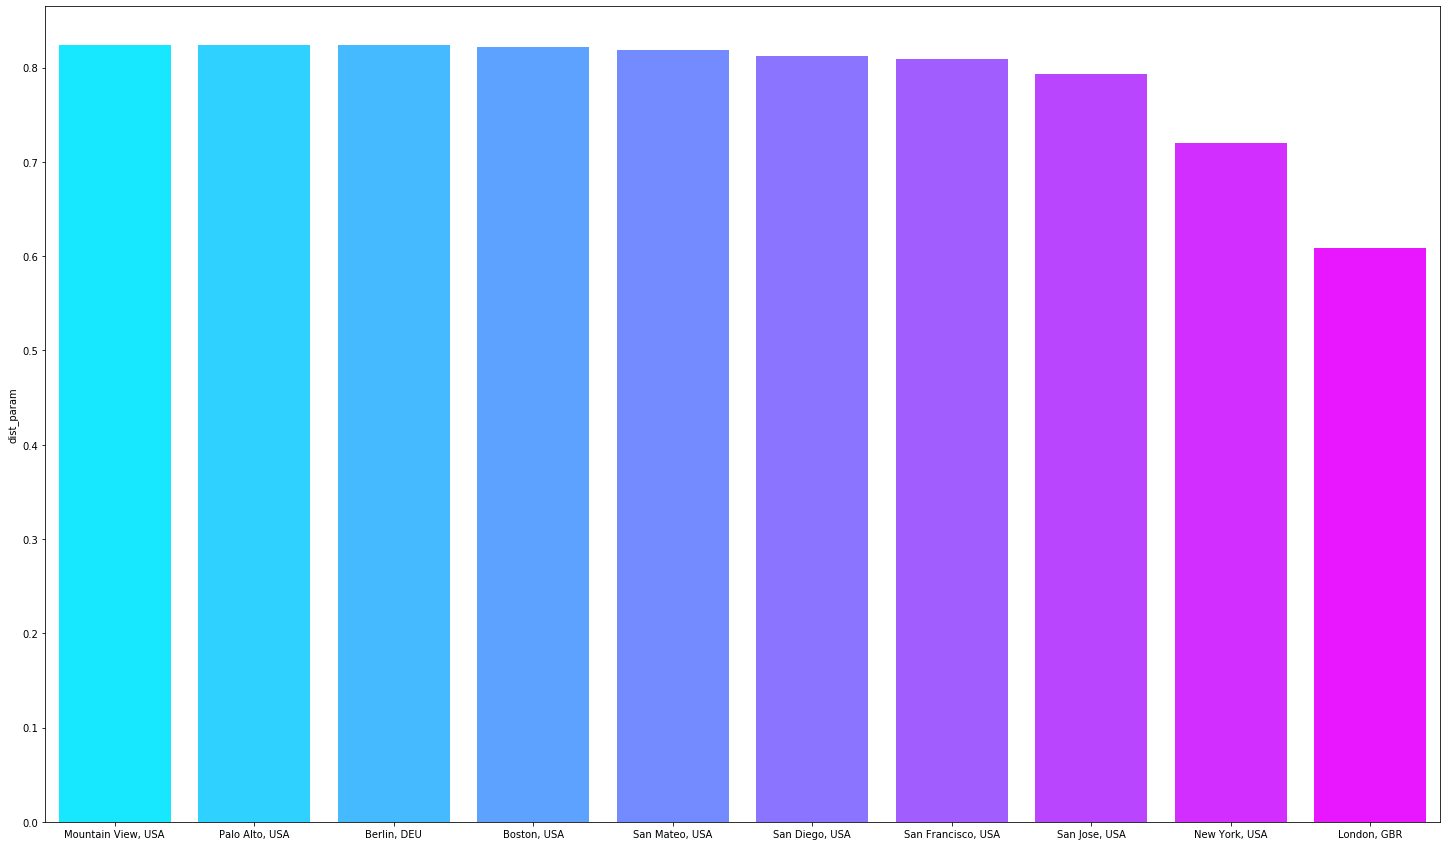

In [423]:
plt.figure(figsize=(25,15))
sns.barplot(x = top_con.index , y='dist_param', data = top_con, palette='cool', saturation=3)
plt.show()

In [412]:
top_cost = metric_df.sort_values('cost_param', ascending=True)[:10]

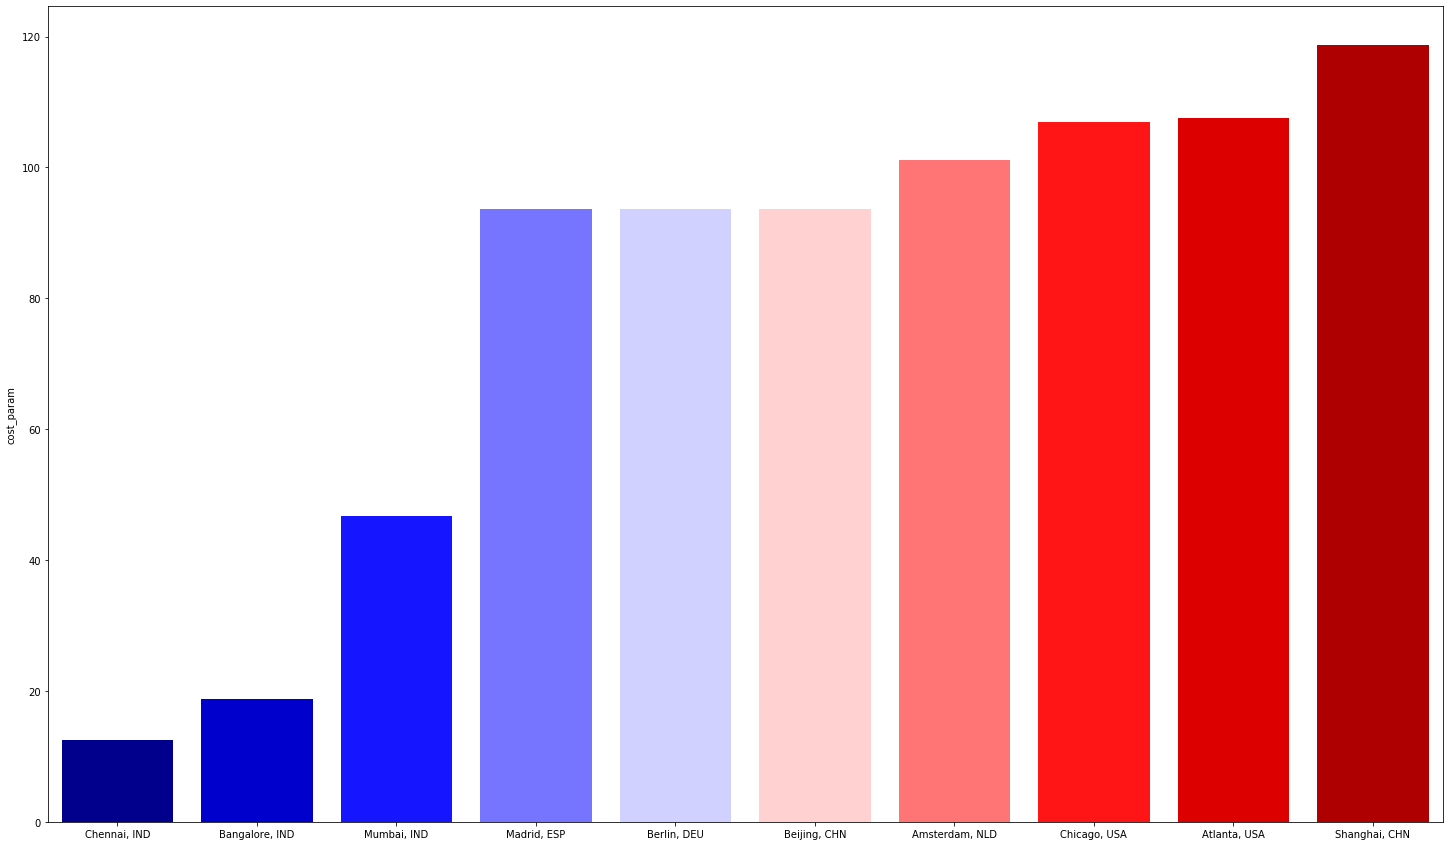

In [425]:
plt.figure(figsize=(25,15))
sns.barplot(x = top_cost.index , y='cost_param', data= top_cost, palette='seismic', saturation=3)
plt.show()

In [405]:
top_scores = metric_df.sort_values('score', ascending=False)[:10]

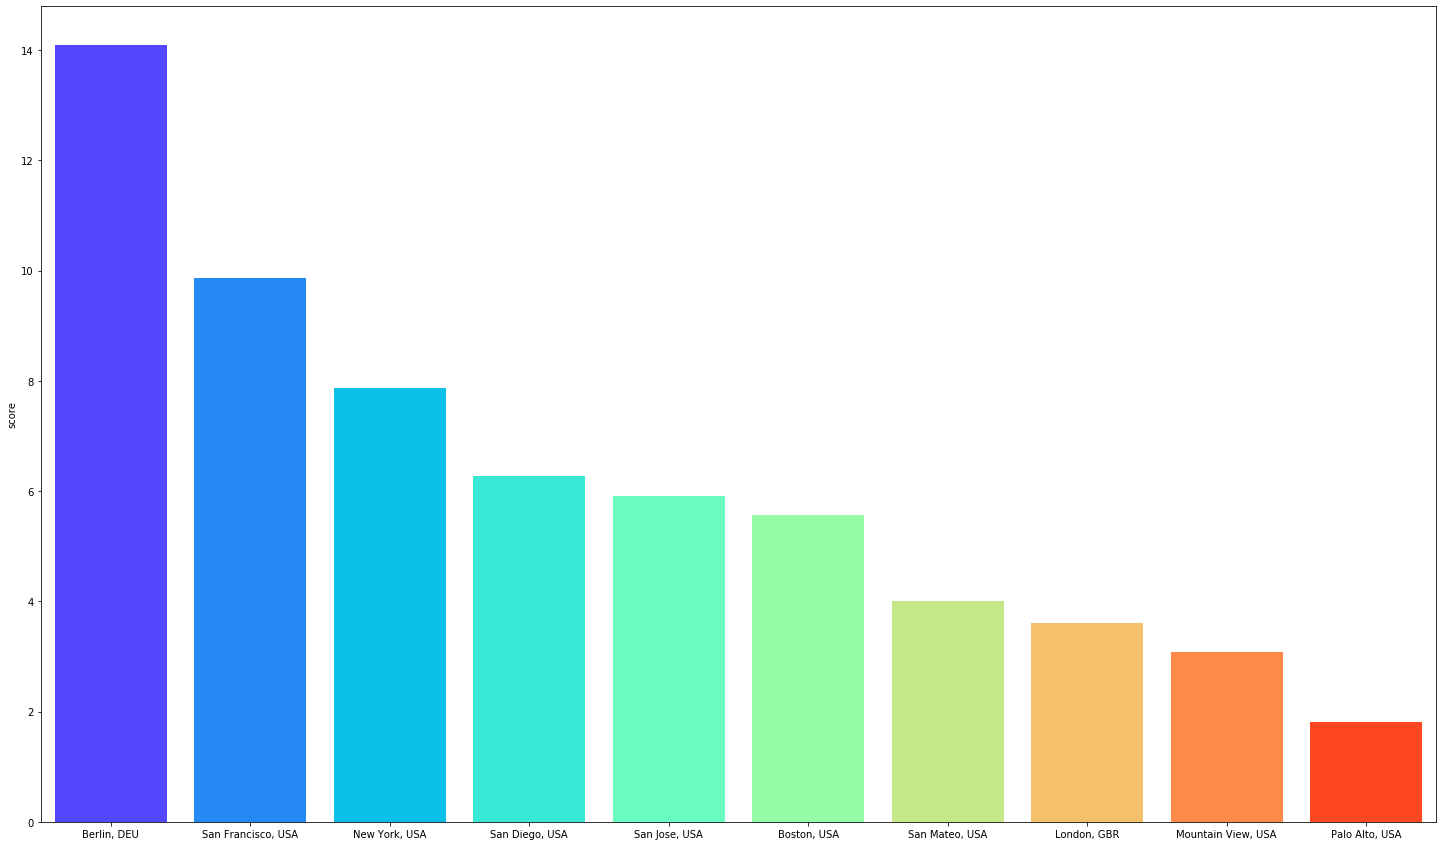

In [417]:
plt.figure(figsize=(25,15))
sns.barplot(x = top_scores.index , y='score', data= top_scores, palette='rainbow', saturation=3)
plt.show()